In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [5]:
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
np.unique(y)

array([0, 1, 2])

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

In [15]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [16]:
y_pred = ppn.predict(X_test_std)

In [17]:
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 4


In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.91


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

In [21]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
lr_y_pred = lr.predict(X_test_std)

In [23]:
#from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, lr_y_pred))

Accuracy: 0.98


In [24]:
lr.predict_proba(X_test_std[0, :])

/Users/joseph/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [25]:
weights, params = [], []

In [26]:
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    print(lr.coef_)
    weights.append(lr.coef_[1])
    params.append(10**c)

[[ -4.49510992e-04  -4.35759439e-04]
 [  6.55979672e-05   3.27209902e-05]
 [  3.83913024e-04   4.03038448e-04]]
[[-0.00447462 -0.00433712]
 [ 0.00065369  0.00032495]
 [ 0.00382093  0.00401217]]
[[-0.04279921 -0.04142528]
 [ 0.00631937  0.00303439]
 [ 0.03647965  0.03839056]]
[[-0.30300251 -0.28948713]
 [ 0.04881993  0.01620922]
 [ 0.25366974  0.27257538]]
[[-1.00342689 -0.90364533]
 [ 0.23882448 -0.06648319]
 [ 0.77522834  0.93509211]]
[[-2.09336507 -1.76672619]
 [ 1.06011115 -0.84154482]
 [ 1.72637718  2.36915927]]
[[-3.52802958 -3.04636269]
 [ 2.19190886 -1.98265142]
 [ 3.87719037  4.50869136]]
[[-5.22828976 -4.78409778]
 [ 2.50582212 -2.30336729]
 [ 7.40534995  5.98765803]]
[[-7.34015187 -6.64685581]
 [ 2.54373335 -2.3421979 ]
 [ 9.46617627  6.44380858]]
[[-9.38725178 -8.62196104]
 [ 2.54760621 -2.34616582]
 [ 9.8260878   6.51345035]]


In [27]:
weights = np.array(weights)


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

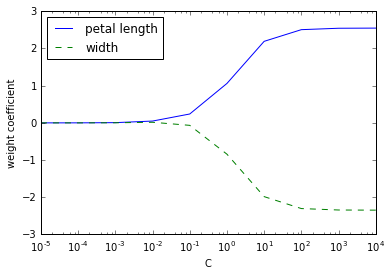

In [33]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--',label='width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## RandomForest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)

In [35]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
forest_y_pred = forest.predict(X_test)

In [37]:
print("RandomForestClassifier Score: %.2f" % accuracy_score(y_test, forest_y_pred))

RandomForestClassifier Score: 0.96
